<a href="https://colab.research.google.com/github/gavindoughtie/mlmath_class/blob/main/LinearAlgebra_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[The course notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/1-intro-to-linear-algebra.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = np.linspace(0, 40, 100) # start, finish, n points

Distance travelled by robber: $d = 2.5t$

In [3]:
d_r = 2.5 * t

Distance travelled by sheriff = $d = 3(t -5)$

In [4]:
d_s = 3 * (t - 5)

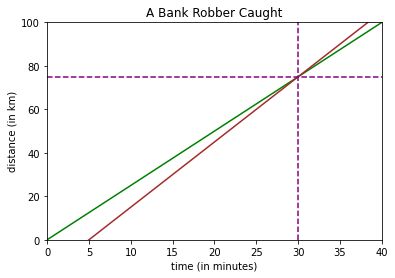

In [5]:
fix, ax = plt.subplots()
plt.title('A Bank Robber Caught')
plt.xlabel('time (in minutes)')
plt.ylabel('distance (in km)')
ax.set_xlim([0, 40])
ax.set_ylim([0, 100])
ax.plot(t, d_r, c='green')
ax.plot(t, d_s, c='brown')
plt.axvline(x=30, color='purple', linestyle='--')
_ = plt.axhline(y=75, color='purple', linestyle='--')

# Tensors

"ML Generalization of vectors and matrices to any number of dimensions"

* scalar: X
* vector: [X, X, X]
* matrix: 
```
[[X, X]
[X, X]]
```

Scalars
* No dimensions
* Single number
* Denoted in lowercase, italics, e.g.: $x$
* Should be *typed*, like all other tensors: e.g., int, float32


https://github.com/jonkrohn/ml-foundations

# Scalars (Rank 0 Tensors) in Base Python

In [6]:
x = 25
x, type(x)

(25, int)

In [7]:
y = 3

In [8]:
py_sum = x + y
py_sum

28

In [9]:
x_float = 25.0
float_sum = x_float + y
float_sum

28.0

In [10]:
type(float_sum)

float

# Scalars in PyTorch

* PyTorch Tensors are designed to be pythonic; to feel and behave like NumPy arrays
* The advantage of PyTorch tensors relative to NumPy arrays is that they can easily be used for operations on GPU
* Documentation on PyTorch tensors is of course googleable

In [11]:
import torch

In [12]:
x_pt = torch.tensor(25) # type specification is optional: dtype=torch.float16
x_pt

tensor(25)

In [13]:
x_pt.shape

torch.Size([])

# Scalars in TensorFlow (ver 2.0 or later)

Tensors created with a wrapper.
* tf.Variable
* tf.constant
* tf.placeholder
* tf.SparseTensor

Most widely used is tf.Variable, which we'll use here.

As with TF tensors in PyTorch we can similarly perform operations and we can easily convert to and from NumPy arrays.

In [14]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [15]:
x_tf = tf.Variable(25, dtype=tf.int16)
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=25>

In [16]:
x_tf.shape

TensorShape([])

In [17]:
y_tf = tf.Variable(3, dtype=tf.int16)
y_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=3>

In [18]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum, x_tf + y_tf

(<tf.Tensor: shape=(), dtype=int16, numpy=28>,
 <tf.Tensor: shape=(), dtype=int16, numpy=28>)

In [19]:
tf_sum.numpy(), type(tf_sum.numpy())

(28, numpy.int16)

In [20]:
tf_float = tf.Variable(25, dtype=tf.float16)
tf_float

<tf.Variable 'Variable:0' shape=() dtype=float16, numpy=25.0>

# Vectors
* One-dimensional array of numbers
* Denoted in lowercase, italics, bold: **$x$**
* Arranged in an order, so element can be accessed by its index
  * Elements are scalars, so *not* bold: second element of **$x$** is $x_2$
* Representing a point in space:
  * Vector of length two represents location in 2D matrix
  * Vector of length three represents location in 3D cube
  * Length of n represents location in $n$-dimensional tensor

## Vector Transposition

Row vector, shape $(1, 3)$ transformed to column vector of shape $(3, 1)$:

$[x_1 x_2 x_3]^\mathsf{T}$ = $
  \begin{bmatrix}
  x_1 \\
  x_2 \\
  x_3 \end{bmatrix}
$

In [21]:
import numpy as np

In [22]:
x = np.array([25, 2, 5]) #, dtype=np.float16)
x, type(x)

(array([25,  2,  5]), numpy.ndarray)

In [23]:
len(x)

3

In [24]:
x.shape

(3,)

In [25]:
x[0]

25

In [26]:
type(x[0])

numpy.int64

# Vector Transposition

In [27]:
# Transposing a regular 1-D array has no effect...
x_t = x.T
x_t

array([25,  2,  5])

In [28]:
# ... but it does if we use "matrix-style" brackets:
y = np.array([[25, 2, 5]])
y

array([[25,  2,  5]])

In [29]:
y.shape

(1, 3)

In [30]:
print(f'y:\n{y}\ny.T:\n{y.T}\ny.Tt.shape:\n{y.T.shape}')

y:
[[25  2  5]]
y.T:
[[25]
 [ 2]
 [ 5]]
y.Tt.shape:
(3, 1)


# Zero Vectors

Have no effect if added to another vector

In [31]:
z = np.zeros(3)
z

array([0., 0., 0.])

In [32]:
y + z

array([[25.,  2.,  5.]])

# Vectors in PyTorch and TensorFlow

In [33]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [34]:
x_tf = tf.Variable([25, 2, 5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

# Norms and Unit Vectors

A vector can represent a magnitude and direction from origin.

*Norms* are a functions that quantify vector magnitude.


#$L^2$ Norm

* Described by:

$\lVert x \rVert_{_2} = \sqrt{\sum\limits_{i} x_i^2}$

* Measures simple (Euclidean) distance from origin
* Most common norm in machine learning
  * Instead of $\Vert x \rVert_{_2}$, it can be denoted as $\lVert x \rVert$

In [35]:
x

array([25,  2,  5])

In [36]:
(25 ** 2 + 2 ** 2 + 5 ** 2) ** (1/2)

25.573423705088842

In [37]:
np.linalg.norm(x)

25.573423705088842

So if units in this 3-dimensional vector space are meters, then the vector $x$ has a length of 25.6m

# Unit Vectors

* Special case of vector where it's length is equal to one
* Technically, $x$ is a unit vecotr with "unit norm", i.e.: $\lVert x \rVert = 1$

# Beyond the $L^2$ Norm

## $L^2$ Norm

* Described by:
$\lVert x \rVert = \sum\limits_{i} \vert x_i \vert $

* Another common norm in machine learning
* Varias linearly at all locations whether near or far from origin
* Used whenever differences between zero and non-zero is key

In [38]:
np.abs(25) + np.abs(2) + np.abs(5) # L1 of vector x

32

In [39]:
np.linalg.norm(x, 1)

32.0

## Squared $L^2$ Norm

* Described by:
$\lVert x \rVert = \sum\limits_{i} x_i^2 $

Like the L2 Norm, but without the square root.

* Computationally cheaper than the L2 norm.
  * Squared $L^2$ norm equals simply $x^\mathsf{T}x$
  * Derivative (used to train many ML algorithms) of element $x$ rquires that element alone, whereas $L^2$ norm requires $x$ vector
* Downside is it grows slowly near origin so it can't be used if distinguishing between zero and near-zero is important. https://towardsdatascience.com/visualizing-regularization-and-the-l1-and-l2-norms-d962aa769932


In [40]:
x

array([25,  2,  5])

In [41]:
(25 ** 2 + 2 ** 2 + 5 ** 2)

654

In [42]:
# we'll cover tensor multiplication soon but:
np.dot(x, x)

654

# Max Norm (or $L^∞$ Norm)

* Described by
$\lVert x \rVert_\infty = \max\limits_{i} \vert x_i \vert $
* Final norm we'll discuss; also occurs frequently in ML
* Returns the absolute value of the largest-magnitude element

In [43]:
x

array([25,  2,  5])

In [44]:
np.max([np.abs(25), np.abs(2), np.abs(5)])

25

# Generalized $L^p$ Norm

* Described by:
$\lVert x \rVert_p = \begin{pmatrix} \sum\limits_{i} | x_i |^p \end{pmatrix}^\frac{1}{p}$

* Formula for all norms (i.e., $L^2$ subs 2 for $p$)
* $p$ must be a real number
* $p$ must be $>=1$
* Norms, particularly $L^1$ and $L^2$, used to regularize objective functions


# Basis Vectors

* Can be scaled to represent *any* vector in a given vector space.

So if you have a unit vector defined by $i (1, 0), j (0, 1)$ as the *basis vector* and you want to scale it to $ (1.5, 0), (0, 2) $ you could just do: $v = 1.5i + 2$

# Orthogonal Vectors

* $x$ and $y$ are orthagonal vectors if $x^\mathsf{T}y = 0$
* Are at $90^{\circ}$ angle to each other (assuming non-zero norms)
* *n*-dimensional space has max *n* mutually orthoganal vectors (again assuming non-zero norms)
* **Orthonormal** vectors are orthoganal *and* all have unit norm.
  * Basis vectors are an example

In [45]:
i = np.array([1, 0])
j = np.array([0, 1])
i, j

(array([1, 0]), array([0, 1]))

In [46]:
np.dot(i, j)

0

# Matrices (Rank 2 Tensors)

* Two-dimensional array of numbers
* Denoted in uppercase, italics, bold, eg: $X$
* Height given priority ahead of width in notation, i.e.: $(n_{row}, n_{col})$
  * if $X$ has three rows and two columns, its shape is (3, 2)
* Individual scalar elements denoted in uppercase, italics only
  * Element in top-right corner of matrix $X$ above would be $X_{1,2}$
* Colon represents an entire row or column:
  * Left column of matrix $X$ is $X_{:,1}$
  * Middle row of matrix $X$ is $X_{2,:}$


In [47]:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [48]:
X.shape

(3, 2)

In [49]:
X.size

6

In [50]:
# Select left column of matrix X (math notation starts at 1,
# unlike 0 the way the good lord intended:
X[:, 0]

array([25,  5,  3])

In [51]:
# Select middle row of matrix X:
X[1,:]

array([ 5, 26])

In [52]:
# Another slicing-by-index example:
X[0:2, 0:2]

array([[25,  2],
       [ 5, 26]])

## Matrices in PyTorch


In [53]:
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

## Matrices in TensorFlow

In [54]:
X_tf = tf.Variable([[25, 2], [5, 26], [3, 7]])
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]], dtype=int32)>

In [55]:
tf.rank(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [56]:
tf.shape(X_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 2], dtype=int32)>

In [57]:
x_tf[1:]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 5], dtype=int32)>

# Generic Tensor Notation

* Upper-case, bold, italics, sans serif: ***X***
* In a 4-tensor ***X***, element at position $(i,j,k,l)$ denoted as ***X***$_{(i,j,k,l)}$


## Higher-Rank Tensors

As an example, rank 4 tensors are common for images, where each dimension correxponds to:
1. Number of images in training batch (32)
2. Image height in pixels (28 for MNIST)
3. Image width in pixels
4. Number of color channels (3)

In [58]:
images_pt = torch.zeros([32, 28, 28, 3]) # same for tf.zeros

In [59]:
images_pt.shape

torch.Size([32, 28, 28, 3])

In [60]:
images_pt.T.shape

<ipython-input-60-9e18ab83c4f3>:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  images_pt.T.shape


torch.Size([3, 28, 28, 32])

# Exercises

In [61]:
# Transpose of 
v = torch.tensor([25, 2, -3, 23])
# same as v:
v.T, v.shape, v.T.shape

(tensor([25,  2, -3, 23]), torch.Size([4]), torch.Size([4]))

In [62]:
# Transpose of
y = [
      [42, 4, 7, 99],
      [-99, -3, 17, 22]
     ]
# [[42, -99]...
torch.tensor(y).T

tensor([[ 42, -99],
        [  4,  -3],
        [  7,  17],
        [ 99,  22]])

## Algebraic shape of y:
$ {(2, 4)} $

Note, it's *ROW COUNT* first

Notation for the position of the element in ***Y*** with the value 17

$ \textbf{Y}_{2, 3} $

Remember, these are indexed starting at 1!

# Tensor Transposition

* Transpose of scalar is itself, e.g.: $ x^T = x $
* Transpose of a vector converts column to row (and vice versa)
* Scalar and vector transposition are special cases of **matrix transposition**:
  * Flip of axes over **main diagonal** such that:
$ (X^T)_{i, j} = X_{j, i} $

In [63]:
print(f'X:\n{X}\nX.T:\n{X.T}') # Numpy, but pytorch is the same

X:
[[25  2]
 [ 5 26]
 [ 3  7]]
X.T:
[[25  5  3]
 [ 2 26  7]]


In [64]:
# In TensorFlow
X_tf = tf.Variable(X)
print(f'X_tf:\n{X_tf}\nX.T:\n{tf.transpose(X_tf)}')

X_tf:
<tf.Variable 'Variable:0' shape=(3, 2) dtype=int64, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]])>
X.T:
[[25  5  3]
 [ 2 26  7]]


# Basic Tensor Arithmetic

Adding or multiplying with scalar applies operation to all elements and the shape is retained

In [65]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [66]:
X * 2

array([[50,  4],
       [10, 52],
       [ 6, 14]])

In [67]:
x + 2

array([27,  4,  7])

In [68]:
X * 2 + 1

array([[51,  5],
       [11, 53],
       [ 7, 15]])

In [69]:
# Same in PyTorch. Operators are overloaded. Uses torch.mul() or torch.add()
X_pt * 2 + 1

tensor([[51,  5],
        [11, 53],
        [ 7, 15]])

If two tensors have the same size, operations are often by default applied element-wise. This is **not matrix multiplication**, which we'll cover later, it is rather called the **Hademard product** or simply the **element-wise product**.

The mathematical notation is $ A \odot X $

# Tensor Reduction

Calculating the sum across all elements of a tensor is a common operation. For example:
* For vector $x$ of length $n$, we calculate $\sum^n_{i=1} x_i$
* For a matrix $X$ with $m$ by $n$ dimensions, we calculate $\sum^n_{i=1} x_i \sum^n_{j=1} x_{i, j} $

In [70]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [71]:
X.sum()

68

In [72]:
torch.sum(X_pt)

tensor(68)

In [73]:
tf.reduce_sum(X_tf)

<tf.Tensor: shape=(), dtype=int64, numpy=68>

In [74]:
# Can also e done along one specific axis alone
X.sum(axis=0)

array([33, 35])

In [75]:
X.sum(axis=1)

array([27, 31, 10])

In [76]:
torch.sum(X_pt, 0)

tensor([33, 35])

In [77]:
tf.reduce_sum(X_tf, 1)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([27, 31, 10])>

Many other operations can be applied with reduction along all or a selection of axes:

* maxiumum
* minimum
* mean
* product

They're fairly straightforward and used less often than summation, so RTFM.

# The Dot Product

If we have two vectors ($x$ and $y$) with the same length $n$, we can calculate the dot product between them. This is annotated several different ways, including the following:

* $x \cdot y$
* $x^Ty$
* $\langle x, y \rangle $

Regardless which notation you use, the calculation is the same: we calculate products in an element-wise fashion and then sum reductively across the products to a scalar value. That is, $x \cdot y = \sum^n_{i=1} x_i y_i $

The dot product is ubiquitous in deep learning: it is performed at every artificial neuron in a deep neural network, which may be made up of millions (or orders of magnitude more) of these neurons.

In [78]:
x

array([25,  2,  5])

In [79]:
y = np.array([0, 1, 2])
y

array([0, 1, 2])

In [80]:
25 * 0 + 2 * 1 + 5 * 2

12

In [81]:
np.dot(x, y)

12

In [82]:
x_pt

tensor([25,  2,  5])

In [83]:
y_pt = torch.tensor(y)
y_pt

tensor([0, 1, 2])

In [84]:
torch.dot(x_pt, y_pt) # May have to be float tensors?

tensor(12)

In [85]:
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

In [86]:
y_tf = tf.Variable(y, dtype=tf.int32)
y_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([0, 1, 2], dtype=int32)>

In [87]:
tf.reduce_sum(tf.multiply(x_tf, y_tf))

<tf.Tensor: shape=(), dtype=int32, numpy=12>

# Segment 3: Matrix Properties

## Exercises:

### Transposition
$\begin{equation*}
y = \begin{bmatrix} 42 & 4 & 7 & 99 \\
-99 & -3 & 17 & 22
\end{bmatrix}
\end{equation*} $

$\begin{equation*}
y^T = \begin{bmatrix} 42 & -99 \\
4 & -3 \\
7 & 17 \\
99 & 22
\end{bmatrix}
\end{equation*} $

## Hademard Product
$
\begin{equation*}
\begin{bmatrix}
25 & 10 \\
-2 & 1
\end{bmatrix} \odot
\begin{bmatrix}
-1 & 7 \\
10 & 8
\end{bmatrix}
= 
\begin{bmatrix}
-25 & 70 \\
-20 & 8
\end{bmatrix}
\end{equation*} $

## Dot Product of tensors $w$ and $x$

$ 
\begin{equation*}
w = \begin{bmatrix}
-1 & 2 & -2
\end{bmatrix} \\
x = \begin{bmatrix}
5 & 10 & 0
\end{bmatrix}
\end{equation*} \\
w \cdot x = 15 $



# Solving Linear Systems

## Method 1: Substitution
* Use whenever there's a variable in the system with a coefficient of 1

For example, when solving for $x$ and $y$ in the following system:

$
\begin{equation*}
y = 3x \\
-5x + 2y = 2
\end{equation*}
$

... we can substitute $y$ with $3x$ in the second equation.

$\therefore (x,y) = (2, 6)$

# Exercises

Solve for the unknowns in the following systems of equations:

1. $x + y = 6, \ 2x + 3y = 16$
2. $-x + 4y = 0, \ 2x - 5y = -6$
3. $y = 4x + 1, \ -4x + y = 2$

1.

$
x = 6 - y \\
or \\
y = 6 - x \\
substitute: \\
2x + 3y = 16
2x + 3(6 - x) = 16 \\
2x + 18 - 3x = 16 \\
2x - 3x = -2 \\
-x = -2 \\
x = 2 \\
y = 6 - 2 = 4 \\
\therefore (x, y) = (2, 4)
$

2. $-x + 4y = 0, \ 2x - 5y = -6$

$
x - 4y = 0 \\
x = 4y \\
8y - 5y = -6 \\
3y = -6 \\
y = -2  \\
so: \\
-x - 8 = 0 \\
-x = 8 \\
x = -8 \\
\therefore (x,y) = (-8, -2)
$

3. $y = 4x + 1, \ -4x + y = 2$

$
-4x + 4x + 1 = 2 \\
0 = 1 \\
\therefore no \ solution
$

# Solving Systems of Linear Equations with Elimination

* Typically best option if no variable in system has a coefficient of 1
* Use *addition property* of equations to eliminate variables
  * If necessary, multiply one or both equations to make elimination of a variable possible

For example, solve for the unknowns in the following system:

$
2x - 3y = 15 \\
4x + 10y = 14
$

... by multiplying the first equation by $-2$ and adding the equations.


ADD the two equations:

$
-4x + 6y = -30 \ + \\
-4x + 10y = 14 \\
\\ Result: \\
16y = -16 \\
y = -1
$

And then substitute:

$
4x - 10 = 14 \\
4x = 24 \\
x = 6 \\
\therefore (x,y) = (6, -1)
$

# Elimination Exercises:

$4x - 3y = 25 \\
-3x + 8y = 10$


$12x - 9y = 75$ (multiply first equation by 3)

$-12x + 32y = 40$ (multiply second equation by 4)

$23y = 115$ (add the equations)

$y = 5$

Then substitute:

$
4x - 15 = 25 \\
4x = 40 \\
x = 10 \\
\therefore (x,y) = (10, 5)$

$
4x + 2y = 4 \\
-5x -3y = -7
$

Aha! Can divide top equation by 2:

$
2x + y = 2 \\
y = 2 - 2x
$

And substitute:

$
-5x + 6 - 6x = -7 \\
-x = 1 \\
x = -1 \\
y = 2 + 2 \\
y = 4 \\
\therefore (x,y) = (-1, 4)
$



# Plotting

Given

$
\begin{equation*}
y = 3x \\
-5x + 2y = 2
\end{equation*}
$

The second equation to be rearranged to isolate $y$:

$
-5x + 2y = 2 \\
y = \frac{2 + 5x}{2} = 1 + \frac{5x}{2}
$

In [88]:
x = np.linspace(-10, 10, 1000) # start, finish, n points

In [89]:
y1 = 3 * x

In [90]:
y2 = 1 + (5*x)/2

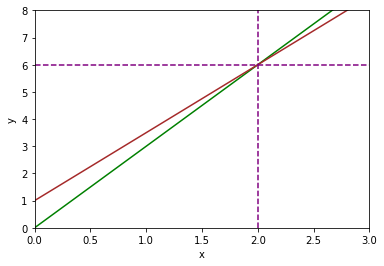

In [91]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([0, 3])
ax.set_ylim([0, 8])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=2, color='purple', linestyle='--')
_ = plt.axhline(y=6, color='purple', linestyle='--')

In the **Elimination** example, the two equations in the system are:

$
2x - 3y = 15 \\
4x + 10y = 14
$

Both equations can be rearranged to isolate $y$, starting with the first equation:

$
-3y = 15 - 2x \\
y = \frac{15=2x}{-3} = -5 + \frac{2x}{3}
$

Then for the second equation:

$
4x + 10y = 14 \\
2x + 5y = 7 \\
5y = 7 - 2x \\
y = \frac{7 - 2x}{5}
$

In [92]:
y1 = -5 + (2 * x) / 3

In [93]:
y2 = (7 - 2 * x) / 5

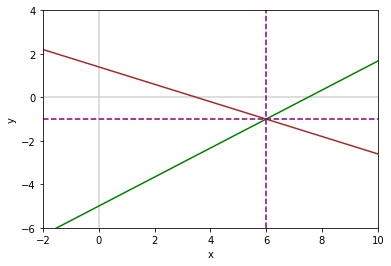

In [94]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
# Add x and y axes:
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 10])
ax.set_ylim([-6, 4])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=6, color='purple', linestyle='--')
_ = plt.axhline(y=-1, color='purple', linestyle='--')

# Matrix Properties

* The Frobenius Norm
* Matrix Multiplication
* Symmetric and Identity Matrices
* Matrix Inversion
* Diagonal Matrices
* Orthoganol Matrices

## The Frobenius Norm

Quantifies the size of a matrix:

* Described by: $ \lVert X \rVert_F = \sqrt{\sum\limits_{i, j} X^2_{i,j}} $

* Analogous to $L^2$ norm of a vector
* Measures the size of matrix in terms of Euclidean distance
  * It's the sum of the [magnitude](https://mathinsight.org/definition/magnitude_vector#:~:text=The%20magnitude%20of%20a%20vector,denoted%20as%20%E2%88%A5a%E2%88%A5.) of all the vectors in $\boldsymbol{X}$



In [95]:
X = np.array([
    [1, 2],
    [3, 4]
])
X

array([[1, 2],
       [3, 4]])

In [96]:
((1 ** 2) + ( 2 ** 2) + ( 3 ** 2) + (4 ** 2))**(1/2)

5.477225575051661

In [97]:
np.linalg.norm(X) # same function as for vector L2 norm; works on integers in numpy

5.477225575051661

In [98]:
X_pt = torch.tensor(X, dtype=float) # has to be float type for PyTorch and Tensorflow
X_pt

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [99]:
torch.norm(X_pt)

tensor(5.4772, dtype=torch.float64)

In [100]:
X_tf = tf.Variable(X, dtype=float)
X_tf

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [101]:
tf.norm(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=5.477226>

## Matrix Multiplication

The number of columns in the first matrix must match the number of rows in the second matrix.

$
{m\begin{bmatrix}
\\
C
\\
\\
\end{bmatrix} \\
 \ \ \ \ \ \ \ p} = 
   {m\begin{bmatrix}
\\
A
\\
\\
\end{bmatrix} \\
 \ \ \ \ \ \ \ n
 } \
 {n\begin{bmatrix}
\\
B
\\
\\
\end{bmatrix} \\
 \ \ \ \ \ \ p
 }
$

$
C_{i,k} = \sum\limits_{j} A_{i,j}B_{j,k}
$

$
{\begin{bmatrix}
3 \ \ 4 \\
5 \ \ 6 \\
7 \ \ 8 \\
\end{bmatrix}}
{\begin{bmatrix}
1 \\
2 \\
\end{bmatrix}} = 
{\begin{bmatrix}
3 \cdot 1 \ + \ 4 \cdot 2 \\
5 \cdot 1 \ + \ 6 \cdot 2 \\
7 \cdot 1 \ + \ 8 \cdot 2 \\
\end{bmatrix}} = 
{\begin{bmatrix}
3 + 8 \\
5 + 12 \\
7 + 16 \\
\end{bmatrix}}= 
{\begin{bmatrix}
11 \\
17 \\
23 \\
\end{bmatrix}}
$

In [102]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [103]:
b = np.array([1, 2])
b

array([1, 2])

In [104]:
np.dot(A, b) # even though dot products are between vectors only in MATH

array([11, 17, 23])

In [105]:
np.matmul(A, b)

array([11, 17, 23])

In [106]:
A_pt = torch.tensor(A)
A_pt

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [107]:
b_pt = torch.tensor(b)
b

array([1, 2])

In [108]:
torch.matmul(A_pt, b_pt), A_pt.matmul(b_pt)

(tensor([11, 17, 23]), tensor([11, 17, 23]))

In [109]:
A_tf = tf.Variable(A)
b_tf = tf.Variable(b)
tf.linalg.matvec(A_tf, b_tf) # must specifically be matrix by vector or matrix by matrix

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([11, 17, 23])>

## Matrix by Matrix Multiplication

$
{\begin{bmatrix}
3 \ \ 4 \\
5 \ \ 6 \\
7 \ \ 8 \\
\end{bmatrix}}
{\begin{bmatrix}
1 \ \ 9 \\
2 \ \ 0 \\
\end{bmatrix}} = 
{\begin{bmatrix}
3 \cdot 1 \ + \ 4 \cdot 2 \ \ \ \ 3 \cdot 9 + 4 \cdot 0 \\
5 \cdot 1 \ + \ 6 \cdot 2 \ \ \ \ 5 \cdot 9 + 6 \cdot 0 \\
7 \cdot 1 \ + \ 8 \cdot 2 \ \ \ \ 7 \cdot 9 + 8 \cdot 0 \\
\end{bmatrix}} = 
{\begin{bmatrix}
11 \ \ 27 \\
17 \ \ 45 \\
23 \ \ 63 \\
\end{bmatrix}}
$

In [110]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [111]:
np.dot(A, B)

array([[11, 27],
       [17, 45],
       [23, 63]])

Not that matrix multiplication is not "commutative" (i.e., $AB \ne BA$) so the following would throw a size mismatch error:

```python
np.dot(B, A)
```

In [112]:
B_pt = torch.from_numpy(B)
B_pt

tensor([[1, 9],
        [2, 0]])

In [113]:
# Another way to create the same tensor with transposition:
B_pt = torch.tensor([[1, 2],[9, 0]]).T
B_pt
# This is cool if you want to think about the columns as independent vectors

tensor([[1, 9],
        [2, 0]])

In [114]:
torch.matmul(A_pt, B_pt) # no need to change functions, unlike in TF

tensor([[11, 27],
        [17, 45],
        [23, 63]])

In [115]:
B_tf = tf.convert_to_tensor(B)
B_tf

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[1, 9],
       [2, 0]])>

In [116]:
tf.matmul(A_tf, B_tf)

<tf.Tensor: shape=(3, 2), dtype=int64, numpy=
array([[11, 27],
       [17, 45],
       [23, 63]])>

### A Machine Learning Example of Matrix Multiplication

Say you have a data set about house prices and the associated attributes for a house ($y$ is the house price).

$y = a + bx_1 + cx_2 + ... + mx_m$

$
\left[
\begin{array}{c|c}
y_1 & a + bx_{1,1} + cx_{1,2} + ... + mx_{1,m} \\
y_2 & a + bx_{2,1} + cx_{2,2} + ... + mx_{2,m} \\
... & ...\\
y_n & a + bx_{n,1} + cx_{n,2} + ... + mx_{n,m} \\
\end{array}
\right]
$

For any house $i$ in the dataset, $y_i$ = price and $X_{i,1}$ to $X_{i,m}$ are its features. We solve for parameters $a, b, c$ to $m$.

(Strictly speaking, $x$ extends rightward to $m-1$ not $m$ because of the presence of $a$ on the far left.)

### Matrix Multiplication (in Regression)

$
n \ cases \ tall
\left\{
\left[
\begin{array}{c|c}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{array}
\right] = 
\left[
\begin{array}{ccccc}
1 & X_{1,1} & X_{1, 2} & \cdots & X_{1,m} \\
1 & X_{2,1} & X_{2, 2} & \cdots & X_{2,m} \\
\vdots & \vdots & \vdots && \vdots \\
1 & X_{n,1} & X_{n, 2} & \cdots & X_{n,m} \\
\end{array}
\right]
\left[
\begin{array}{c|c}
a \\
b \\
\vdots \\
m
\end{array}
\right]
\right.
$

Also $m$ features wide but still learning LaTeX.

### Matrix Multiplication (in Deep Learning)

Essentially lots of different matrices and vectors being multiplied across.

[jonkrohn.com/deepPT](https://jonkrohn.com/deepPT)

## Symmetric and Identity Matrices


### Symmetric Matrices

Special matrix case with the following properties:

* Square
* $X^T = X$
* Example:
$
\left[
\begin{array}{ccc}
0 & 1 & 2 \\
1 & 7 & 8 \\
2 & 8 & 9
\end{array}
\right]
$

In [117]:
X_sym = np.array([[0,1,2], [1,7,8], [2,8,9]])
X_sym

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [118]:
X_sym.T

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [119]:
X_sym.T == X_sym

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Identity Matrices

Symmetric matrix where:
* Every element along main diagonal is $1$
* All other elements are $0$
* Notation: $I_n$ where $n$ = height (or width)
* $n$-length vector unchanged when multiplied by identity matrix

$
\left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}
\right]
$

In [120]:
I = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [121]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [122]:
torch.matmul(I, x_pt)

tensor([25,  2,  5])

### Exercises

1. $
\left[
\begin{array}{ccc}
0 & 1 & 2 \\
3 & 4 & 5 \\
6 & 7 & 8 \\
\end{array}
\right]
\left[
\begin{array}{c}
-1 \\
1 \\
-2 \\
\end{array}
\right] = \left[
\begin{array}{ccc}
0 & \ + 1 & \ + -4 \\
-3 & \ + 4 & \ + -10 \\
-6 & \ + 7 & \ + -16 \\
\end{array}
\right] = \left[
\begin{array}{c}
-3 \\
-9 \\
-15 \\
\end{array}
\right]
$

2. Repeat 1. using the same vector but replace the martrix with $I_3$: $
\left[
\begin{array}{c}
-1 \\
1 \\
-2 \\
\end{array}
\right]
$

3. $
\left[
\begin{array}{ccc}
0 & 1 & 2 \\
3 & 4 & 5 \\
6 & 7 & 8 \\
\end{array}
\right]
\left[
\begin{array}{cc}
-1 & 0 \\
1 & 1 \\
-2 & 2\\
\end{array}
\right] = \left[
\begin{array}{cc}
0 + 1 + -4 &  0 + 1 + 4\\
-3 + 4 + -10 & 0 + 4 + 10\\
-6 + 7 + -16 & 0 + 7 + 16\\
\end{array}
\right] = \left[
\begin{array}{cc}
-3 &  5\\
-9 & 14\\
-15 & 23\\
\end{array}
\right]
$

## Matrix Inversion

* Clever, convenient approach for solving linear equations computationally
* An alternative to manually solving with substitution or elimination
* **Matrix inverse** of $X$ is denoted as $X^{-1}$
  * Satisfies: $X^{-1} = I_n$

$
n \ cases \ tall
\left\{
\left[
\begin{array}{c|c}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{array}
\right] = 
\left[
\begin{array}{ccccc}
1 & X_{1,1} & X_{1, 2} & \cdots & X_{1,m} \\
1 & X_{2,1} & X_{2, 2} & \cdots & X_{2,m} \\
\vdots & \vdots & \vdots && \vdots \\
1 & X_{n,1} & X_{n, 2} & \cdots & X_{n,m} \\
\end{array}
\right]
\left[
\begin{array}{c|c}
a \\
b \\
\vdots \\
m
\end{array}
\right]
\right.
$

Regression formula can be represented as: 
$y = Xw$ ($w$ is the vector of weights $a$ through $m$)

## Matrix Inversion

In the equation $y = Xw$:
* We know the outcomes $y$, which could be house prices
* We know the features $X$, which are predictors like bedroom count
* Vector $w$ contains the unknowns, the model's learnable parameters

Assuming $X^{-1}$ exists, matrix inversion can solve for $w$:

$Xw = y$

$X^{-1}Xw = X^{-1}y $

$I_nw = X^{-1}y$

$w = X^{-1}y $

$\left\{\vcenter{4b + 2c = 4 \\
-5b - 3c = -7}
\right.$

$
X = \left[
\begin{array}{cc}
X_{1,1} & X_{1,2} \\
X_{2,1} & X_{2,2}
\end{array}
\right] = \left[
\begin{array}{cc}
4 & 2 \\
-5 & -3
\end{array}
\right]
$

$
y = 
\left[
\begin{array}{c}
4 \\
-7
\end{array}
\right]
$

$
w = \left[
  \begin{array}{c}
  w_1 \\
  w_2
  \end{array}
\right] = \left[
  \begin{array}{c}
  b \\
  c
  \end{array}
\right] = X^{-1}y
$

In [123]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [124]:
Xinv = np.linalg.inv(X) # MAGIC (go look it up)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [125]:
y = np.array([4, -7])
y_pt

tensor([0, 1, 2])

In [126]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that $y = Xw$

In [127]:
np.dot(X, w)

array([ 4., -7.])

### In PyTorch and TensorFlow

In [128]:
torch.inverse(torch.tensor([[4, 2], [-5, -3.]])) # float type

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [129]:
tf.linalg.inv(tf.Variable([[4, 2], [-5, -3.]])) # also float

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.4999998,  0.9999998],
       [-2.4999995, -1.9999996]], dtype=float32)>

### Limitations of Matrix Inversion

Can only be calculated if:

* Matrix isn't "singular"
* That is, all columns of matrix must be linearly independent
  * If a column is [1, 2], another can't be [2, 4] or also be [1,2]
  * (That is there must be ONE solution rather than no or infinite solutions)
* Matrix is square: $n_{row} = n_{col}$ (i.e. "vector span" = "matrix range")
  * avoids **overdetermination**: $ n_{row} > n_{col}$ i.e.: $ n_{equations} > n_{dimensions} $
  * avoids **underdetermination**: $ n_{row} < n_{col}$ i.e.: $ n_{equations} < n_{dimensions} $

*Note that solving equation may still be possible by other means if matrix can't be inverted (Algebra II)*

### Matrix Inversion Where No Solution

In [130]:
X = np.array([[-4, 1], [-8, 2]]) # note that second row is a multiple of the first row
X

array([[-4,  1],
       [-8,  2]])

In [131]:
# Uncommented the following line results in a "singular matrix" error
# Xinv = np.linalg.inv(X)

Feel free to try inverting a non-square matrix; this will throw an error too.

## Diagonal Matrix

* Nonzero elements along main diagonal; zeros everywhere else
* Identity matrix is an example
* If square, denoted as diag($x$) where $x$ is a vector of main-diagonal elements
* Computationally efficient:
  * Multiplication: diag($x$)$y$ = $x ⨀ y$
  * Inversion: $diag(x)^{-1} = diag[1/x_1, …, 1/x_n]^T$
    * Can't divide by zero so $x$ can't include zero
* Can be non-square and computation still efficient:
  * If $h > w$, simply add zeros to product
  * If $h < w$, remove elements from product


## Orthogonal Matrices

Recall orthonormal vectors:
  * Orthogonal from each other AND have unit length (so [0, 1], [1, 0])

In orghogonal matrices, orthonormal vectors:
  * Make up all rows
  * Make up all columns
This means $A^TA = AA^T = I$

Which also means: $A^T = A^{-1}I = A^{-1}$
Calculating $A^T$ is cheap, therefore so is calculating $A^{-1}$